In [19]:
#import dependencies

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
pd.set_option('max_colwidth', 400)

In [2]:
#creating new csv for stephanie's research question
new_wp_mentalhealth_df = pd.read_csv("Resources/cleaned_workplace_mental_health.csv")


mental_health_assistance_df = new_wp_mentalhealth_df[['Have Benefits','Seeks Treatment', 'Care Options', 'Wellness Programs', 'Help Resources', 'Anonymity']]

mental_health_assistance_df.to_csv('Resources/workplace_assistance.csv')

mental_health_assistance_df.head()


,Have Benefits,Seeks Treatment,Care Options,Wellness Programs,Help Resources,Anonymity
0,Yes,Yes,Not sure,No,Yes,Yes
1,Don't know,No,No,Don't know,Don't know,Don't know
2,No,No,No,No,No,Don't know
3,No,Yes,Yes,No,No,No
4,Yes,No,No,Don't know,Don't know,Don't know


In [3]:
mental_health_assistance_df.astype(str)


,Have Benefits,Seeks Treatment,Care Options,Wellness Programs,Help Resources,Anonymity
0,Yes,Yes,Not sure,No,Yes,Yes
1,Don't know,No,No,Don't know,Don't know,Don't know
2,No,No,No,No,No,Don't know
3,No,Yes,Yes,No,No,No
4,Yes,No,No,Don't know,Don't know,Don't know
...,...,...,...,...,...,...
1254,No,Yes,No,No,No,Don't know
1255,Yes,Yes,Yes,No,No,Yes
1256,Yes,Yes,Yes,No,No,Don't know
1257,No,No,Yes,No,No,Don't know


In [4]:
# stephanie's question 1: if the workplace offers mental health assistance are employees more likely to seek treatment?

#created a new dataframe where all benefits are yes 

yes_benefit_df = mental_health_assistance_df.loc[mental_health_assistance_df['Have Benefits'] == 'Yes']
yes_benefit_count= yes_benefit_df[['Have Benefits']].value_counts()
yes_benefit_count

Have Benefits
Yes              477
dtype: int64

In [5]:
#filtering through the benefits column where treatment was also yes

yes_benefit_treatment_df = yes_benefit_df.loc[yes_benefit_df['Seeks Treatment'] == 'Yes']
yes_benefit_treatment_count = yes_benefit_treatment_df['Seeks Treatment'].value_counts()
yes_benefit_treatment_count

Yes    305
Name: Seeks Treatment, dtype: int64

In [6]:
#find the average out of how many people that had benefits that also got treatment

average_yes = yes_benefit_treatment_count/len(yes_benefit_df)
percent_yes = average_yes*100
print(f'On avarege, {float(percent_yes):.2f} % of those whom have mental health coverage do seeks treatments for their mental health.') 

On avarege, 63.94 % of those whom have mental health coverage do seeks treatments for their mental health.


In [7]:
#created a new dataframe where workers had no benefits #benefits is no but treatment is yes

No_benefit_df = mental_health_assistance_df.loc[mental_health_assistance_df['Have Benefits'] == 'No']
No_benefit_valuecount= No_benefit_df[['Have Benefits','Seeks Treatment']].value_counts()
No_benefit_valuecount

Have Benefits  Seeks Treatment
No             No                 193
               Yes                181
dtype: int64

In [8]:
#benefits is no but treatment is yes

yestreat_nobenifit_count = 181

#benefits is no & treatment is no

notreat_nobenifit_count = 193

In [9]:
#finding the average of how many people got treatment even if benefits weren't offered 

yestreat_nobenifit_avg = yestreat_nobenifit_count/len(No_benefit_df)
yestreat_nobenifit_avg

0.4839572192513369

In [10]:
percent_no = yestreat_nobenifit_avg*100
print(f'On avarege, {float(percent_no):.2f} % of those whom do not have mental health coverage still do seeks treatments for their mental health.') 


On avarege, 48.40 % of those whom do not have mental health coverage still do seeks treatments for their mental health.


In [11]:
#how many got treatment whether benefits was offered or not

amount_all = len(mental_health_assistance_df.loc[mental_health_assistance_df['Seeks Treatment'] == 'Yes'])
amount_all
print(f'Overall in the dataset, {amount_all} individuals do seeks treatments for their mental health, regardless of wheter their employers offers metal health benefits.') 

Overall in the dataset, 637 individuals do seeks treatments for their mental health, regardless of wheter their employers offers metal health benefits.


In [12]:
#finding the average of how many people on average get treatment

average_all = (amount_all/len(mental_health_assistance_df))*100
average_all

#Results: about 50% of people get treatment

print(f'Overall, {float(average_all):.2f} % do seeks treatments for their mental health.') 


Overall, 50.60 % do seeks treatments for their mental health.


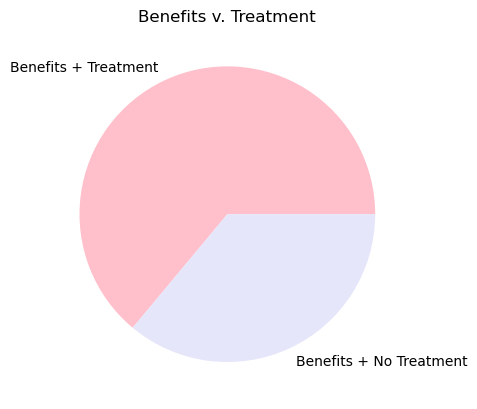

In [13]:
#create pie chart

q1_piechart= [305, 172]
mylabels = ["Benefits + Treatment", "Benefits + No Treatment"]
mcolors = ["pink","lavender"]


plt.pie(q1_piechart, labels = mylabels, colors = mcolors )
plt.title("Benefits v. Treatment")

plt.savefig('Resources/benefits_treatment.png' ,bbox_inches = 'tight' )
plt.show()


In [24]:
yes_benefit_df.head()

,Have Benefits,Seeks Treatment,Care Options,Wellness Programs,Help Resources,Anonymity
0,Yes,Yes,Not sure,No,Yes,Yes
4,Yes,No,No,Don't know,Don't know,Don't know
5,Yes,No,Not sure,No,Don't know,Don't know
8,Yes,Yes,Yes,No,No,No
12,Yes,Yes,Yes,No,No,Don't know


In [26]:
correlation = st.pearsonr(yes_benefit_df['Have Benefits'],yes_benefit_df['Seeks Treatment'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is nan


/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


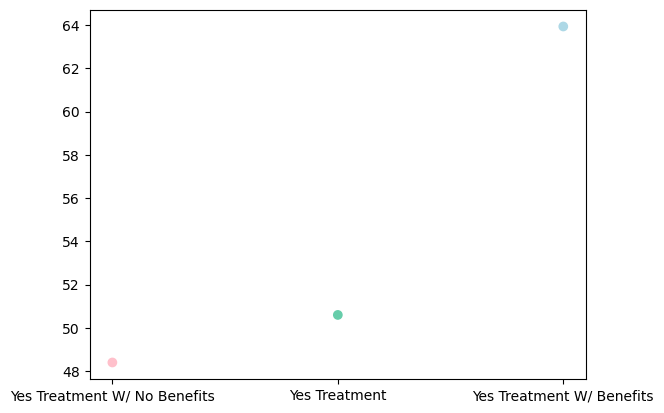

In [14]:
#create scatter plot

y = [float(percent_no), float(average_all), float(percent_yes)] 
x = ["Yes Treatment W/ No Benefits","Yes Treatment","Yes Treatment W/ Benefits"]
colors = ['pink','mediumaquamarine','lightblue']

plt.scatter(x,y, c = colors)



plt.savefig('Resources/scatter_benefits_treatment.png', bbox_inches = 'tight')
plt.show()


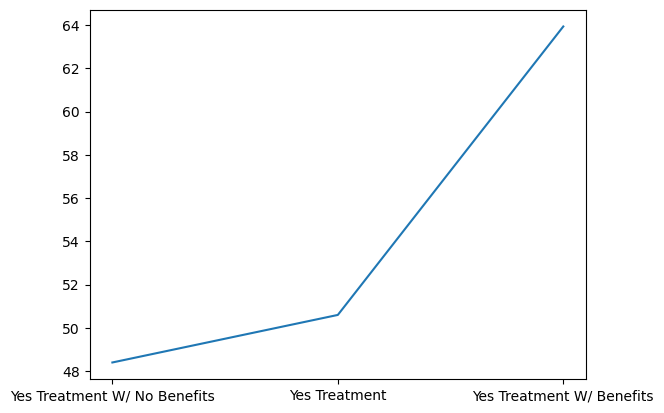

In [15]:
#create line plot

plt.plot(x,y)

plt.savefig('Resources/line_benefits_treatment.png', bbox_inches = 'tight')
plt.show()

In [16]:
#stephanie's question 2: if the worker who have benefits is anonymously protected,  are they more likely to seek out help from their workplace mental health assistance programs? 

yes_benefir_anon_df = yes_benefit_df.loc[yes_benefit_df['Anonymity'] == 'Yes']
yes_benefir_anon_treatment_df = yes_benefir_anon_df.loc[yes_benefir_anon_df['Seeks Treatment'] == 'Yes']
yes_benefir_anon_treatment_count = yes_benefir_anon_treatment_df['Anonymity'].value_counts()
yes_benefir_anon_treatment_count

Yes    151
Name: Anonymity, dtype: int64

In [17]:
#check how many got treatment at work when no anonymity was offered

yes_benefir_not_anon_df = yes_benefit_df.loc[yes_benefit_df['Anonymity'] == 'No']
yes_benefir_treatment_not_anon_df = yes_benefir_not_anon_df.loc[yes_benefir_not_anon_df['Seeks Treatment'] == 'Yes']
yes_treatment_not_anon_count = yes_benefir_treatment_not_anon_df['Anonymity'].value_counts()
yes_treatment_not_anon_count

No    6
Name: Anonymity, dtype: int64

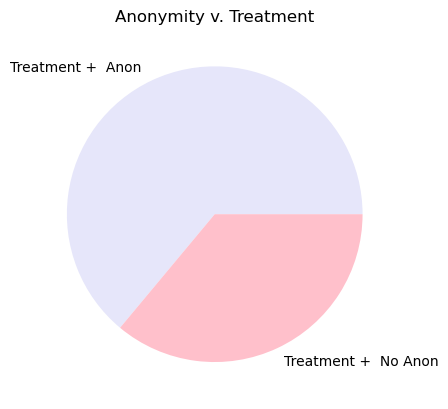

In [18]:
#create pie chart

q2_piechart= [151, 6]
mylabels = [ "Treatment +  Anon ", "Treatment +  No Anon"]
mcolors = ["lavender","pink"]


plt.pie(q1_piechart, labels = mylabels, colors = mcolors )
plt.title("Anonymity v. Treatment")

plt.savefig('Resources/anonymity_treatment.png',bbox_inches = 'tight')
#plt.show()